# **Diplomado IA: Aplicaciones 1 - NLP**. <br> Práctico 3: Modelos de lenguaje (ElMo, BERT, GPT2)
---
---

**Profesores:**
- Carlos Aspillaga
- Pablo Messina

**Ayudante:**
- Nissim Ergas
---
---

# **Instrucciones Generales**

El siguiente práctico se puede realizar **individualmente o en parejas**. Solo uno debe realizar la entrega. El formato de entrega es el **archivo .ipynb con todas las celdas ejecutadas**. Todas las preguntas deben ser respondidas en las celdas dispuestas para ello. No se aceptará el _output_ de una celda de código como respuesta.

**Nombre compañero 1:** FRANCISCO MENA

**Nombre compañero 2:** COMPLETAR

El siguiente práctico cuenta con 4 partes y contendrá actividades a realizar.

**IMPORTANTE: habrá un bonus de 1 décima para todos aquellos alumnos/as que muestren buen orden en sus respuestas (esto aplica a legibilidad de código, buena redacción, formalidad, organización del jupyter notebook, seguimiento de instrucciones, etc). El criterio lo pondrá cada ayudante corrector. La nota máxima obtenible en el laboratorio es 7.0**

# **Índice**

>[Diplomado IA: Aplicaciones 1 - NLP.  Práctico 3: Modelos de lenguaje (ElMo, BERT, GPT2)](#scrollTo=tHopPtVaNF1K)

>[Instrucciones Generales](#scrollTo=D4--58EgLXxI)

>[Índice](#scrollTo=jCb8075QLdVx)

>[ELMo](#scrollTo=QowbUszVAyrv)

>>[Instalación de dependencias](#scrollTo=s_-RHBZkLxIO)

>>[ELMo: Uso Básico](#scrollTo=GeY2bVqKLUz1)

>>[Visualizando los embeddings de ELMo](#scrollTo=Kzd_GOxunlh5)

>>[Actividades](#scrollTo=QiOarh-8d81k)

>[Librería "Transformers", de Huggingface](#scrollTo=XmRz5CaMDuNJ)

>>[Instalación de dependencias](#scrollTo=WAl2ZQQ3Lm9R)

>>[Uso básico de la librería](#scrollTo=IEf542-yNkLX)

>>[Actividad](#scrollTo=rzmdJB4EObaw)

>[BERT](#scrollTo=TUoT7x1uNu0i)

>>[Finetuning de BERT para detectar Fake News](#scrollTo=9D9wMxO7NDAy)

>[GPT-2](#scrollTo=uCE6qym-NxJs)

>>[GPT-2: Generación de texto](#scrollTo=sQI4zJORMjkX)

>>[Actividades](#scrollTo=rKftFZ2W4XKJ)

>[Actividad Final](#scrollTo=Acvhf7xiPN1W)



# **ELMo**

![ELMo](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/03/output_YyJc8E.gif)

##Instalación de dependencias

Instalamos el tokenizador usado en la implementación original de ELMo: Moses

In [ ]:
!pip install sacremoses

     |████████████████████████████████| 890kB 7.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=dd50a14325be97b240e86e1f3f8b783d1184065e9eff17cda87535b96166a5c5
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


Instalamos la librería donde está la implementación original de los autores

In [ ]:
!pip install allennlp==0.4.2

     |████████████████████████████████| 716kB 7.5MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 245kB 15.5MB/s 
     |████████████████████████████████| 3.5MB 19.4MB/s 
     |████████████████████████████████| 430kB 51.8MB/s 
     |████████████████████████████████| 102kB 15.7MB/s 
     |████████████████████████████████| 512kB 60.2MB/s 
     |████████████████████████████████| 1.7MB 57.2MB/s 
     |████████████████████████████████| 25.2MB 128kB/s 
     |████████████████████████████████| 496.4MB 33kB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 92kB 14.2MB/s 
     |████████████████████████████████| 7.1MB 48.1MB/s 
     |████████████████████████████████| 552kB 55.1MB/s 
     |████████████████████████████████| 71kB 11.9MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
     |████████████████████████████████| 92kB 14.6MB/s 
     |████████████████████████████████| 614kB 45.0MB/s 
  

## ELMo: Uso Básico

Con la librería AllenNLP, para usar ELMo preentrenado basta con crear un ElmoEmbedder indicando la ruta (o la URL) de los parámetros a usar (options.json) y pesos preentrenados (weights.hdf5) que corresponda.

En el ejemplo usaremos el ELMo-large original (en inglés), pero existen varios modelos preentrenados alternativos. Por ejemplo, existe ELMo para documentos médicos (pubmed), para diferentes idiomas, etc.

Aquí dejamos algunos links a versiones preentrenadas de ELMo que pueden ser de utilidad para usted:

https://allennlp.org/elmo

https://github.com/lastrodrigo/SpanishElmoFullWeights

https://github.com/HIT-SCIR/ELMoForManyLangs

In [ ]:
from sacremoses import MosesTokenizer
import allennlp
from allennlp.commands.elmo import ElmoEmbedder
import numpy as np

elmo = allennlp.commands.elmo.ElmoEmbedder(
    options_file='https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway_5.5B/elmo_2x4096_512_2048cnn_2xhighway_5.5B_options.json', 
    weight_file='https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway_5.5B/elmo_2x4096_512_2048cnn_2xhighway_5.5B_weights.hdf5'
)
moses_tokenizer = MosesTokenizer()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
100%|██████████| 374434792/374434792 [00:05<00:00, 65443568.04B/s]


In [ ]:
text = "I love to eat pizza!"
tokenized_text = moses_tokenizer.tokenize(text, escape=False)
embeddings = elmo.embed_sentence(tokenized_text) 

print('Tokenized text: '+str(tokenized_text))
print('Output type: '+str(type(embeddings)))
print('Output shape: '+str(embeddings.shape))
#print('Output values: '+str(embeddings))


Tokenized text: ['I', 'love', 'to', 'eat', 'pizza', '!']
Output type: <class 'numpy.ndarray'>
Output shape: (3, 6, 1024)


In [ ]:
text = "I love to eat chocolate ice-cream!"
tokenized_text = moses_tokenizer.tokenize(text, escape=False)
embeddings = elmo.embed_sentence(tokenized_text) 

print('Tokenized text: '+str(tokenized_text))
print('Output type: '+str(type(embeddings)))
print('Output shape: '+str(embeddings.shape))
#print('Output values: '+str(embeddings))

Tokenized text: ['I', 'love', 'to', 'eat', 'chocolate', 'ice-cream', '!']
Output type: <class 'numpy.ndarray'>
Output shape: (3, 7, 1024)


In [ ]:
#Embedding de la palabra chocolate
embeddings[:,4, :]

array([[-0.2549594 , -0.07758811,  0.07650048, ...,  0.49495095,
        -0.332729  , -0.52942926],
       [-0.3559524 ,  0.14694646, -0.29904157, ..., -0.02152529,
        -0.02482205,  0.25790268],
       [-0.5058409 ,  0.59350306, -1.0214949 , ..., -0.01887555,
        -0.17183164,  0.40613195]], dtype=float32)

Estos vectores podríamos usarlos para cualquier tarea down-stream. Podríamos usarlos en lugar de los vectores Word2Vec de la clase pasada, de tal manera de que la representación considere contexto y no solo las palabras individualmente.

## Visualizando los embeddings de ELMo

A continuación extraeremos los embeddings ELMo para diferentes oraciones donde se usa la palabra "play" con diferentes sentidos semánticos.

In [ ]:
sentences = ["Chile plays soccer like anyone else",
             "My father plays the piano every day",
             "We went to see the play Romeo and Juliet at the theater", 
             "A child is playing the guitar",
             "There was absolute silence during the play",
             "The coach devised a great play that put the visiting team on the defensive",
             "The children went out to play in the park",
             "He plays the King, and she's the Queen",
             "No part of the brain plays the role of permanent memory",
             "I've practiced the piano off and on, but I still can't play very well",
             "We especially like to play jazz together",
             "You can play the DVD now",
             "to play cannon upon a fortification",
             "My son thinks he can play music",
             "Look at the score now ... 23 plays 8!",
             "You played me!",
             "to play a trump in a card game",
             "His latest film is playing in the local theatre tomorrow",
             "He played the torch beam around the room"]

labels = []
all_embeddings = []
for sentence in sentences:
    tok = moses_tokenizer.tokenize(sentence, escape=False)
    emb = elmo.embed_sentence(tok)
    emb = emb.transpose(1,0,2).reshape((emb.shape[1], emb.shape[-1]*emb.shape[0])) # reordenamos el resultado para que en las filas queden los tokens y en las columnas los features
    all_embeddings.append(emb)
    labels += list(tok)
tokens = np.concatenate(all_embeddings, axis=0) # concatenamos todo para que quede un gran numpy array donde cada fila es un token y cada columna un feature

A continuación visualizaremos los embeddings (que son multidimensionales) llevándolos a 2D gracias a una técnica llamada T-SNE (van der Maaten, L.J.P.; Hinton, G.E. Visualizing High-Dimensional Data) que esencialmente intenta preservar las relaciones de cercanía entre elementos.

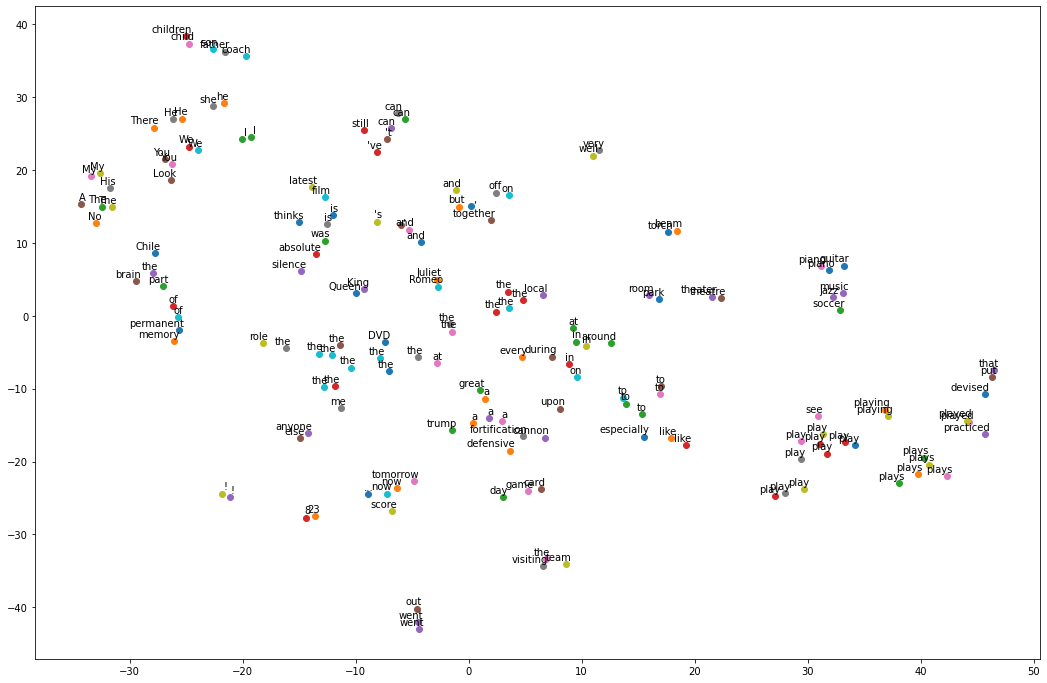

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne_model = TSNE(perplexity=6, n_components=2, init='random', n_iter=800)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
    
plt.figure(figsize=(18, 12)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                  xy=(x[i], y[i]),
                  xytext=(5, 2),
                  textcoords='offset points',
                  ha='right',
                  va='bottom')
plt.show()

## Actividades

Como vimos anteriormente, obtener los embeddings de ELMo es sencillo. Lo único con que hay que ser cuidadosos es al usar el resultado entregado por ELMo. Las actividades a continuación buscan precisamente reforzar el entendimiento de este punto.

*   **1) Observe las dimensiones del resultado entregado por ELMo al ejecutarlo sobre las oraciones de ejemplo. Por ejemplo, al ejecutarlo sobre la oración "I love to eat chocolate ice-cream!" se puede ver que entrega un arreglo de tamaño (3, 7, 1024) ¿Qué representa la primera componente del tamaño de este arreglo (en el ejemplo, el 3)?**

In [ ]:
#@title Respuesta 1

Primera componente = 'Uno para cada capa (estado oculto o entrada o salida)' #@param ["seleccione una opcion", "Uno para cada token","Uno para cada estado oculto final de cada bi-LSTM luego de procesar toda la oracion", "Uno para cada dimension del estado oculto (o entrada o salida)","Uno para cada peso de las bi-LSTMs correspondientes a esa capa","Uno para cada capa (estado oculto o entrada o salida)"]

SyntaxError: ignored

*   **2) Observe las dimensiones del resultado entregado por ELMo al ejecutarlo sobre las oraciones de ejemplo. Por ejemplo, al ejecutarlo sobre la oración "I love to eat chocolate ice-cream!" se puede ver que entrega un arreglo de tamaño (3, 7, 1024) ¿Qué representa la segunda componente del tamaño de este arreglo (en el ejemplo, el 7)?**

In [ ]:
#@title Respuesta 2

Segunda componente = 'Uno para cada token' #@param ["seleccione una opcion", "Uno para cada token","Uno para cada estado oculto final de cada bi-LSTM luego de procesar toda la oracion", "Uno para cada dimension del estado oculto (o entrada o salida)","Uno para cada peso de las bi-LSTMs correspondientes a esa capa","Uno para cada capa (estado oculto o entrada o salida)"]

*   **3) Observe las dimensiones del resultado entregado por ELMo al ejecutarlo sobre las oraciones de ejemplo. Por ejemplo, al ejecutarlo sobre la oración "I love to eat chocolate ice-cream!" se puede ver que entrega un arreglo de tamaño (3, 7, 1024) ¿Qué representa la tercera componente del tamaño de este arreglo (en el ejemplo, el 1024)?**

In [ ]:
#@title Respuesta 3

Tercera componente = 'Uno para cada estado oculto final de cada bi-LSTM luego de procesar toda la oracion' #@param ["seleccione una opcion", "Uno para cada token","Uno para cada estado oculto final de cada bi-LSTM luego de procesar toda la oracion", "Uno para cada dimension del estado oculto (o entrada o salida)","Uno para cada peso de las bi-LSTMs correspondientes a esa capa","Uno para cada capa (estado oculto o entrada o salida)"]

*   **4) A partir del output que entrega ELMo para la oración "I love to eat chocolate ice-cream!", extraiga los embeddings correspondientes a la palabra "chocolate".** Importante!: Imprima en pantalla el vector, para poder verificar su respuesta. No importa si numpy muestra el resultado truncado al hacer el print

*Hint: En la dimensión correspondiente, la implementación de ELMo entrega los resultados ordenados: el primer elemento será el token de más a la izquierda, y el último será el token de más a la derecha.*

In [ ]:
text = "I love to eat chocolate ice-cream!"
# Escriba aquí su respuesta.
# No olvide hacer print() de la salida!
text = "I love to eat chocolate ice-cream!"
tokenized_text = moses_tokenizer.tokenize(text, escape=False)
embeddings = elmo.embed_sentence(tokenized_text) 

print('Tokenized text: '+str(tokenized_text))
print('Output type: '+str(type(embeddings)))
print('Output shape: '+str(embeddings.shape))
print('Embedding de palabra chocolate: '+str(embeddings[:,4,:]))

Tokenized text: ['I', 'love', 'to', 'eat', 'chocolate', 'ice-cream', '!']
Output type: <class 'numpy.ndarray'>
Output shape: (3, 7, 1024)
Embedding de palabra chocolate: [[-0.2549594  -0.07758811  0.07650048 ...  0.49495095 -0.332729
  -0.52942926]
 [-0.3628501   0.13626194 -0.29133984 ... -0.0216265  -0.02666566
   0.26002395]
 [-0.59124655  0.6813808  -0.97513413 ... -0.01152388 -0.16444278
   0.39782   ]]


*   **5) A partir del output que entrega ELMo para la oración "I love to eat chocolate ice-cream!", extraiga todos los embeddings que resultan luego de correr la capa de salida para toda la oración.** Importante! Imprima en pantalla el vector, para poder verificar su respuesta. No importa si numpy muestra el resultado truncado al hacer el print.

*Hint: En la dimensión correspondiente, la implementación de ELMo entrega los resultados ordenados: el primer elemento será el más cercano a la entrada y el último a la salida.*

In [ ]:
text = "I love to eat chocolate ice-cream!"
# Escriba aquí su respuesta.
# No olvide hacer print() de la salida!
tokenized_text = moses_tokenizer.tokenize(text, escape=False)
embeddings = elmo.embed_sentence(tokenized_text) 

print('Tokenized text: '+str(tokenized_text))
print('Output type: '+str(type(embeddings)))
print('Output shape: '+str(embeddings.shape))
print('Output values Ultima Capa: '+str(embeddings[-1,4,:]))

Tokenized text: ['I', 'love', 'to', 'eat', 'chocolate', 'ice-cream', '!']
Output type: <class 'numpy.ndarray'>
Output shape: (3, 7, 1024)
Output values Ultima Capa: [-0.5894432   0.6800121  -0.9763435  ... -0.01250124 -0.1637129
  0.3975544 ]


# **Librería "Transformers", de Huggingface**

**NOTA IMPORTANTE: Dado que para correr ELMo tuvimos que instalar una versión antigua de pytorch, recomendamos reiniciar el entorno de ejecución antes de continuar ejecutando el resto del laboratorio:**

`Entorno de ejecución > Restablecer estado de fábrica del entorno de ejecución`

## Instalación de dependencias

In [ ]:
!pip install transformers==3.5.1

     |████████████████████████████████| 1.3MB 24.3MB/s 
     |████████████████████████████████| 2.9MB 53.5MB/s 
     |████████████████████████████████| 890kB 52.7MB/s 
     |████████████████████████████████| 1.1MB 41.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=0c15365b0804a8f2ac89ffc460811a85e8c597d196dd6ed6014f29565d8626e3
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


## Uso básico de la librería

La librería "Transformers" de Huggingface es una librería opensource que se ha encargado de facilitar el uso de los modelos basados en transformer. Incluye prácticamente todos los modelos principales y está en constante actualización (actualmente tiene 33 + varios otros contrinuidos por la comunidad).

Aquí puede ver todas las arquitecturas soportadas: https://huggingface.co/transformers/index.html

Aquí puede ver todos los pesos preentrenados disponibles:
https://huggingface.co/transformers/pretrained_models.html

Aquí puede ver ejemplos de código ejecutando las tareas más comunes: https://huggingface.co/transformers/examples.html

A continuación veremos un ejemplo de uso de un modelo cualquiera, que debería ser muy similar a casi todos los modelos disponibles en la librería.

In [ ]:
from transformers import XLNetTokenizer, XLNetModel
import torch

tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = XLNetModel.from_pretrained('xlnet-base-cased', return_dict=True)

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

In [ ]:
from transformers import XLNetTokenizer, XLNetForQuestionAnswering
import torch

tokenizer =  XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = XLNetForQuestionAnswering.from_pretrained('xlnet-base-cased', return_dict=True)

input_ids = torch.tensor(tokenizer.encode("Hello, my dog is cute", add_special_tokens=True)).unsqueeze(0)  # Batch size 1
start_positions = torch.tensor([1])
end_positions = torch.tensor([3])
outputs = model(input_ids, start_positions=start_positions, end_positions=end_positions)

loss = outputs.loss

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForQuestionAnswering: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForQuestionAnswering were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['start_logits.dense.weight', 'start_logits.dense.bias', 'end_logits.dense_0.weight', 'end_logits.dense_0.bias', 'end_logits.LayerNorm.weight', 'end_logits.LayerNorm.bias', 'end_logits.dense_1.weight', 'end_logits.dense_1.bias',

In [ ]:
from transformers import XLNetTokenizer, XLNetForMultipleChoice
import torch

tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = XLNetForMultipleChoice.from_pretrained('xlnet-base-cased', return_dict=True)

prompt = "In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced."
choice0 = "It is eaten with a fork and a knife."
choice1 = "It is eaten while held in the hand."
labels = torch.tensor(0).unsqueeze(0)  # choice0 is correct (according to Wikipedia ;)), batch size 1

encoding = tokenizer([[prompt, prompt], [choice0, choice1]], return_tensors='pt', padding=True)
outputs = model(**{k: v.unsqueeze(0) for k,v in encoding.items()}, labels=labels)  # batch size is 1

# the linear classifier still needs to be trained
loss = outputs.loss
logits = outputs.logits

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForMultipleChoice: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForMultipleChoice were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##Actividad

Para esta actividad tendrá que revisar la documentación de Huggingface para un modelo diferente a los mostrados en clase. Puede elegir cualquiera que le llame la atención de entre los soportados por huggingface (siempre que no sea BERT ni GPT2 ni XLNet). Nos interesa que usted sea capaz de hacer esto pues en el futuro posiblemente nazcan modelos superiores a los vistos en clase y usted quiera poder usarlos.

**6) Escriba (o copie-pegue) aquí la(s) línea(s) de código necesaria(s) para crear el modelo en su versión basica (es decir, no especializado en QuestionAnswering, MultipleChoice, ni nada por el estilo) y para cargar sus pesos preentrenados. No olvide los imports necesarios**

In [ ]:
from transformers import T5Tokenizer, T5Model
import torch

tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5Model.from_pretrained('t5-small', return_dict=True)


Some weights of T5Model were not initialized from the model checkpoint at t5-small and are newly initialized: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**7) Escriba aquí la linea de código necesaria para crear el tokenizador. No olvide los imports necesarios**

In [ ]:
tokenizer = T5Tokenizer.from_pretrained('t5-small')

**8) Escriba aquí la(s) líneas de código necesarias para tokenizar la oración "Hello World!"**

In [ ]:
text = "Hello World!"
# Escriba aquí el codigo con su respuesta
tokenizer(text)

{'input_ids': [8774, 1150, 55, 1], 'attention_mask': [1, 1, 1, 1]}

**9) Escriba aquí la(s) líneas de código necesarias para ejecutar el modelo sobre la oración tokenizada**

In [ ]:
# Escriba aquí el codigo con su respuesta

#NOTA: referencia usada: https://huggingface.co/transformers/model_doc/t5.html

input_ids = tokenizer("Hello World!", return_tensors="pt").input_ids  # Batch size 1
decoder_input_ids = tokenizer("Hi!", return_tensors="pt").input_ids  # Batch size 1

outputs = model(input_ids=input_ids, decoder_input_ids=decoder_input_ids)

last_hidden_states = outputs.last_hidden_state
last_hidden_states

tensor([[[ 1.9406e-01,  9.9607e-03, -5.8667e-02,  ...,  5.7367e-02,
          -3.5076e-04,  1.8007e-01],
         [ 1.4713e-01,  7.1189e-02, -8.2752e-02,  ...,  4.8894e-02,
           1.5128e-04,  9.2527e-02],
         [ 1.1639e-01,  1.0161e-01, -3.7652e-02,  ...,  4.6462e-02,
           3.5707e-04,  6.6578e-02]]], grad_fn=<MulBackward0>)

# **BERT**

##Finetuning de BERT para detectar Fake News

In [ ]:
!pip install transformers==3.5.1

Parcialmente basado en el tutorial de https://towardsdatascience.com/bert-text-classification-using-pytorch-723dfb8b6b5b

Dataset https://www.kaggle.com/nopdev/real-and-fake-news-dataset

Preprocesamiento:

*  Eliminación de textos cortos (<5 palabras)
*  Concatenación de titulo + texto (separado por un punto)
*  Truncamiento de textos largos a máximo 200 caracteres
*  FAKE = 1, REAL = 0
*  Split de train (80%), dev (15%) y test (15%)

In [ ]:
!if [ ! -f news.csv ]; then wget -q https://www.dropbox.com/s/5pfv1td1oyj611w/news.csv; fi

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
from torchtext.data import Field, TabularDataset, BucketIterator, Iterator
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import os

# Leer CSV original
df_raw = pd.read_csv('news.csv')

# Preparar columnas
df_raw['label'] = (df_raw['label'] == 'FAKE').astype('int')
df_raw['titletext'] = df_raw['title'] + ". " + df_raw['text']
df_raw = df_raw.reindex(columns=['label', 'title', 'text', 'titletext'])

# Eliminar textos muy cortos y truncar textos muy largos
df_raw.drop(df_raw[df_raw.text.str.len() < 5].index, inplace=True)
df_raw['text'] = df_raw['text'].apply(lambda x: ' '.join(x.split(maxsplit=200)[:200]))
df_raw['titletext'] = df_raw['titletext'].apply(lambda x: ' '.join(x.split(maxsplit=200)[:200])) 

# Separar por clase, para dividir train-val-test de manera balanceada
df_real = df_raw[df_raw['label'] == 0]
df_fake = df_raw[df_raw['label'] == 1]

# Dividir en train-val y test a razon 80%/10%/10%
df_real_train, df_real_full_test = train_test_split(df_real, train_size = 0.8, random_state = 1)
df_fake_train, df_fake_full_test = train_test_split(df_fake, train_size = 0.8, random_state = 1)
df_real_test, df_real_valid = train_test_split(df_real_full_test, train_size = 0.5, random_state = 1)
df_fake_test, df_fake_valid = train_test_split(df_fake_full_test, train_size = 0.5, random_state = 1)
df_train = pd.concat([df_real_train, df_fake_train], ignore_index=True, sort=False)
df_valid = pd.concat([df_real_valid, df_fake_valid], ignore_index=True, sort=False)
df_test = pd.concat([df_real_test, df_fake_test], ignore_index=True, sort=False)

# Guardar resultado como CSV
df_train.to_csv('news_train.csv', index=False)
df_valid.to_csv('news_val.csv', index=False)
df_test.to_csv('news_test.csv', index=False)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Parametros del modelo
MAX_SEQ_LEN = 128
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)

# Crear el dataset
label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(use_vocab=False, tokenize=tokenizer.encode, lower=False, include_lengths=False, batch_first=True,
                   fix_length=MAX_SEQ_LEN, pad_token=PAD_INDEX, unk_token=UNK_INDEX)
fields = [('label', label_field), ('title', text_field), ('text', text_field), ('titletext', text_field)]
train, valid, test = TabularDataset.splits(path='.', train='news_train.csv', validation='news_val.csv',
                                           test='news_test.csv', format='CSV', fields=fields, skip_header=True)

# Crear iteradores de los sets de entrenamiento, validación y test
train_iter = BucketIterator(train, batch_size=16, sort_key=lambda x: len(x.text),
                            device=device, train=True, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(valid, batch_size=16, sort_key=lambda x: len(x.text),
                            device=device, train=True, sort=True, sort_within_batch=True)
test_iter = Iterator(test, batch_size=16, device=device, train=False, shuffle=False, sort=False)

Token indices sequence length is longer than the specified maximum sequence length for this model (4230 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
def train(model,
          optimizer,
          criterion = nn.BCELoss(),
          train_loader = train_iter,
          valid_loader = valid_iter,
          num_epochs = 5,
          eval_every = len(train_iter) // 2,
          file_path = 'temp_results',
          best_valid_loss = float("Inf")):

    if not os.path.exists(file_path):
        os.makedirs(file_path)
    
    # inicializar contadores
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    # loop de entrenamento
    model.train()
    for epoch in range(num_epochs):
        for (labels, title, text, titletext), _ in train_loader:
            labels = labels.type(torch.LongTensor)           
            labels = labels.to(device)
            titletext = titletext.type(torch.LongTensor)  
            titletext = titletext.to(device)
            loss, predictions = model(titletext, labels=labels)[:2]

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # actualizar conteos
            running_loss += loss.item()
            global_step += 1

            # evaluacion
            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():                    

                    # validacion
                    for (labels, title, text, titletext), _ in valid_loader:
                        labels = labels.type(torch.LongTensor)           
                        labels = labels.to(device)
                        titletext = titletext.type(torch.LongTensor)  
                        titletext = titletext.to(device)
                        loss, predictions = model(titletext, labels=labels)[:2]
                        
                        valid_running_loss += loss.item()

                # evaluacion
                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                # resetear conteos de la epoca
                running_loss = 0.0                
                valid_running_loss = 0.0
                model.train()

                # imprimir resultados hasta el momento
                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))
                
                # checkpoint
                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint(file_path + '/' + 'model.pt', model, best_valid_loss)
    
    print('Finished Training!')

def save_checkpoint(save_path, model, valid_loss):
    if save_path == None:
        return
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model):
    if load_path==None:
        return
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=2e-5)

train(model=model, optimizer=optimizer, num_epochs=1)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch [1/1], Step [157/315], Train Loss: 0.4133, Valid Loss: 0.3283
Model saved to ==> temp_results/model.pt
Epoch [1/1], Step [314/315], Train Loss: 0.1373, Valid Loss: 0.3308
Finished Training!


In [ ]:
# Evaluation Function

def evaluate(model, test_loader):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
        for (labels, title, text, titletext), _ in test_loader:

                labels = labels.type(torch.LongTensor)           
                labels = labels.to(device)
                titletext = titletext.type(torch.LongTensor)  
                titletext = titletext.to(device)
                loss, predictions = model(titletext, labels=labels)[:2]
                y_pred.extend(torch.argmax(predictions, 1).tolist())
                y_true.extend(labels.tolist())
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))
    
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    ax.xaxis.set_ticklabels(['FAKE', 'REAL'])
    ax.yaxis.set_ticklabels(['FAKE', 'REAL'])

Model loaded from <== temp_results/model.pt
Classification Report:
              precision    recall  f1-score   support

           1     0.9094    0.8978    0.9035       313
           0     0.9003    0.9117    0.9060       317

    accuracy                         0.9048       630
   macro avg     0.9048    0.9047    0.9047       630
weighted avg     0.9048    0.9048    0.9048       630



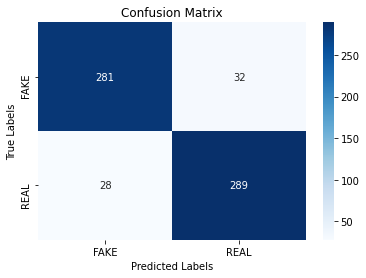

In [ ]:
load_checkpoint('temp_results/model.pt', model)

evaluate(model, test_iter)

# **GPT-2**

## GPT-2: Generación de texto

En la siguiente actividad, generaremos texto usaremos GPT2 preentrenado. 

Si bien estaremos usando los pesos preentrenados de la versión pequeña (gpt2) puede usar también la versión grande (gpt2-xl).

Adicionalmente también es posible hacer finetuning de GPT2 para que genere textos según lo que usted requiera. Un tutorial para eso puede encontrarse en https://towardsdatascience.com/fine-tuning-gpt2-for-text-generation-using-pytorch-2ee61a4f1ba7

Primero instalaremos la librería (en caso de no estar instalada)

In [ ]:
!pip install transformers==3.5.1

In [ ]:
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


A continuación podemos generar un texto usando el modelo GPT2. Solamente le tenemos que entregar una frase inicial, y el modelo luego entrega una posible continuación para el texto.

In [ ]:
input_ids = tokenizer.encode('I enjoy walking with my cute dog', return_tensors='tf')

beam_output = model.generate(
    input_ids, 
    max_length=100, 
    num_beams=5, 
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I'm not sure if I'll ever be able to walk with him again.

I'm not sure if I'll ever be able to walk with him again.

I'm not sure if I'll ever be able to walk with him again.

I'm not sure if I'll ever be able to walk with him again.

I


Vemos que no genera un texto del todo convincente, pues tiene muchas repeticiones (lo cual es muy usual en este tipo de modelos). Para resolver eso podemos restringir que no repita ciertos ngrams de la siguiente forma:

In [ ]:
input_ids = tokenizer.encode('I enjoy walking with my cute dog', return_tensors='tf')

beam_output = model.generate(
    input_ids, 
    max_length=100, 
    num_beams=5, 
    no_repeat_ngram_size=2,
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's time for me to take a step back and think about what I want to do next. I've always wanted to be a writer, so I thought I'd share my thoughts on how I would go about writing a book about my love of writing. Here are some of the things I


## Actividades

**10) Como ha visto a lo largo de este laboratorio, cada modelo trae su propio tokenizador. ¿Qué efecto tendría si usáramos el tokenizador de un modelo (ejemplo: el de BERT) para otro (ejemplo: para GPT2)?. Explique muy brevemente el efecto que podría tener en los resultados, asumiendo que solo se usará en modo "inferencia", no en modo "entrenamiento" ni "finetuning", y que el código ejecuta sin errores.**

Los modelos fueron entrenados con sus propios tokenizadores. Es posible que el modelo no se cayese y entregase un resultado con texto procesado con un tokenizador de otro modelo, pero el resultado podria no tener sentido. 

**11) Los modelos GPT, GPT2 y GPT3 son modelos diseñado para generar texto. El modo de uso básico es entregarle un texto inicial, y el modelo simplemente completa el resto del texto según lo que estima como una continuación probable (dado lo que vio en entrenamiento). ¿Es esto un impedimento para realizar tareas más dirigidas, donde nos gustaría hacer que el modelo genere un texto siguiendo cierta lógica de interés (ej: summarization)?** Asuma que está usando el modelo sin modificaciones a la medida ni finetuning.

*Hint: esto fue mencionado durante la clase o laboratorio, así que en caso de dudas puede consultar la grabación de la clase :)*


In [ ]:
#@title Respuesta

Respuesta = 'No es un impedimento. Si se puede hacer.' #@param ["seleccione una opcion", "Si es un impedimento. No se puede hacer.", "No es un impedimento. Si se puede hacer.", "Es un impedimento en algunos casos, pero no en otros."]
Justificación = "Uno puede usar el \"base\" model y hacerle fine-tuning para que cumpla otras tareas. De esta manera uno tiene todas las ventajas del \"base model\", y ahora especializado para la tarea que uno quiere." #@param {type:"string"}

**12) Supongamos que usted quiere generar con GPT2 un texto extenso (supongamos que son varias hojas de texto generado) donde el tema principal sea "New York". Como se mencionó en el laboratorio, usar un código como este puede traer un problema en cuanto al texto generado.**
 
 ```
 model.generate(input, max_length=1000000, 
    num_beams=5, 
    no_repeat_ngram_size=2,
    early_stopping=True
)
```


**¿Cuál es ese problema? ¿Cómo podría resolverse?**

*Hint: esto fue mencionado durante la clase o laboratorio, así que en caso de dudas puede consultar la grabación de la clase :)*

In [ ]:
#@title Respuesta

Problema = "El problema es que cuando max_length es demasiado grande, el modelo se demora muchisimo" #@param {type:"string"}
Una posible solución = 'Uno podria usar el modelo con max_length = 1.000, y generar texto multiples veces. Luego el texto total es la union de los distintos textos.' #@param {type:"string"}

SyntaxError: ignored

# **Actividad Final**

En este laboratorio usamos los modelos pre-entrenados para ELMo, BERT y GPT2, los cuales fueron entrenados en inglés. **¿Qué recomendaría hacer para usarlos para el idioma español en sus propios proyectos?** Asuma que tiene recursos y tiempo acotados (ej: no es factible entrenar GPT2 desde cero para español).

Para cada arquitectura, comente si es posible o no. De ser posible proponga al menos una solución concreta (OJO: se evaluará que la solución sea super concreta). De no ser posible, justifique. No se extienda más allá de un párrafo por modelo (Ojo: se espera que la respuesta sea breve).

**13) Para el caso de ELMo**: 
- ¿Es posible?: Si
- Justificación/Solución: Se puede obtener los pesos para Elmo en Español desde https://github.com/lastrodrigo/SpanishElmoFullWeights

**14) Para el caso de BERT**: 
- ¿Es posible?: Si
- Justificación/Solución: Se pueden bajar los pesos de Bert de la version "bert-base-multilingual-cased" desde la web https://huggingface.co/transformers/pretrained_models.html, y hacerle fine tuning al español. O tambien uno podria bajar y usar Beto desde https://github.com/dccuchile/beto

**15) Para el caso de GPT2**: 
- ¿Es posible?: Si, aunque no sera facil
- Justificación/Solución: Se pueden bajar los pesos de GPT2 de la web https://huggingface.co/transformers/pretrained_models.html y luego hacer fine-tuning al español. Claro que como GPT2 es muy grande tomará tiempo y recursos. 